In [435]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [436]:
## Convert string to numbers
def cast_to_numeric(string):
    if type(string) == float:
        return string
    else:
        string = string.replace(',', '').replace('$', '')
        number = float(string)
        return number

In [437]:
## Associate Yearly Salary
Associate_Quarters_Total = Assoc_Salary['Qtr1'] + Assoc_Salary['Qtr2'] + Assoc_Salary['Qtr3'] + Assoc_Salary['Qtr4']
Associate_Yearly_Salary = Associate_Quarters_Total / 4 * 52

## Bachelor Yearly Salary
Bachelor_Quarters_Total = Bachelor_Salary['Qtr1'] + Bachelor_Salary['Qtr2'] + Bachelor_Salary['Qtr3'] + Bachelor_Salary['Qtr4']
Bachelor_Yearly_Salary = Bachelor_Quarters_Total / 4 * 52

In [470]:
## Cost of Associate Degree
Associate_Cost_Data = pd.read_csv('../Data/Cost_of_College_2020.csv', skiprows = 49, nrows = 9)
Associate_Cost_Data['10,318'] = Associate_Cost_Data['10,318'].apply(cast_to_numeric)
Total_Associate_Cost = Associate_Cost_Data['10,318'] * 4

## Cost of Bachelor Degree
Bachelor_Cost_Data = pd.read_csv('../Data/Cost_of_College_2020.csv', skiprows=49, nrows = 9)
Bachelor_Cost_Data['25,682'] = Bachelor_Cost_Data['25,682'].apply(cast_to_numeric)
Total_Bachelor_Cost = Bachelor_Cost_Data['25,682'] * 4
Total_Associate_Cost

0    42260.0
1    42576.0
2    43312.0
3    44136.0
4    44940.0
5    44936.0
6    44384.0
7    46272.0
8    45564.0
Name: 10,318, dtype: float64

In [439]:
## Years to pay off Associate degree
AS_Years_Paid_Off = Total_Associate_Cost / Associate_Yearly_Salary

## Years to pay off Bachelor degree
BA_Years_Paid_Off = Total_Bachelor_Cost / Bachelor_Yearly_Salary

In [454]:
## Inflation rate data set
Inflation_Rate = pd.DataFrame(
                    {'Inflation': [18.78, 15.4, 13.56, 11.83, 11.92, 10.41, 7.72, 5.53, 3.92, 1.4]}, 
                    index = [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

In [441]:
## Original Cost of Bachelor Degree (Without Inflation)
Read_Original_Bachelor_Cost = pd.read_csv('../Data/Cost_of_College_2020.csv', skiprows = 49, nrows = 9) 
Original_Bachelor_Cost = Read_Original_Bachelor_Cost['22,074']

## Original Cost of Associate Degree (Without Inflation)
Read_Original_Associate_Cost = pd.read_csv('../Data/Cost_of_College_2020.csv', skiprows = 49, nrows = 9) 
Original_Associate_Cost = Read_Original_Associate_Cost['8,868']

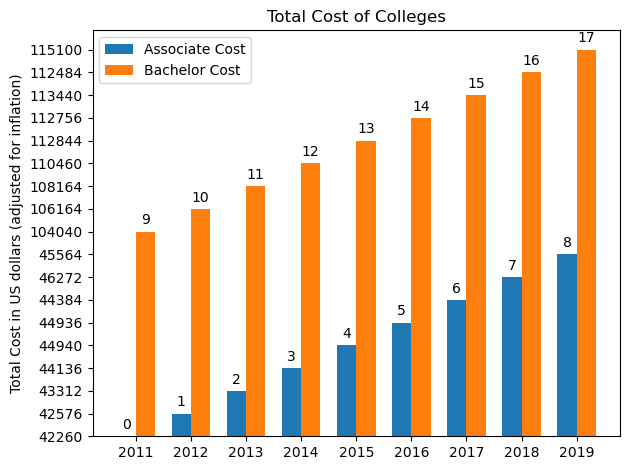

In [489]:
## Associate vs Bachelor Costs each year
labels = ['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']
Bar_Chart_Associate_Cost = ['42260', '42576', '43312', '44136', '44940', '44936', '44384', '46272', '45564']
Bar_Chart_Bachelor_Cost = ['104040', '106164', '108164', '110460', '112844', '112756', '113440', '112484', '115100']

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, Bar_Chart_Associate_Cost, width, label = 'Associate Cost')
rects2 = ax.bar(x + width/2, Bar_Chart_Bachelor_Cost, width, label = 'Bachelor Cost')

ax.set_ylabel('Total Cost in US dollars (adjusted for inflation)')
ax.set_title('Total Cost of Colleges')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

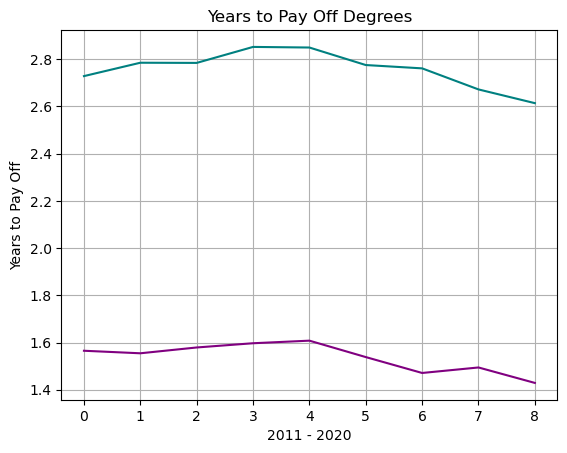

In [488]:
##How long to pay off each degree from the academic year 2011-2012 to 2019-2020
S1 = AS_Years_Paid_Off
S2 = BA_Years_Paid_Off

fig, ax = plt.subplots(1)
ax.plot(S1, label='Associate Degree', color='purple')
ax.plot(S2, label='Bachelor Degree', color='teal')
ax.set_title('Years to Pay Off Degrees')
##ax.legend(loc='upper left')
ax.set_xlabel('2011 - 2020')
ax.set_ylabel('Years to Pay Off')
ax.grid()

<AxesSubplot:xlabel='Year', ylabel='Qtr1'>

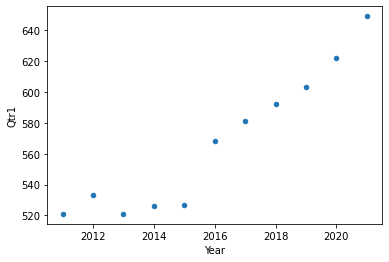

In [456]:
Assoc_Salary.plot.scatter(x = 'Year',
                          y = 'Qtr1')

<AxesSubplot:>

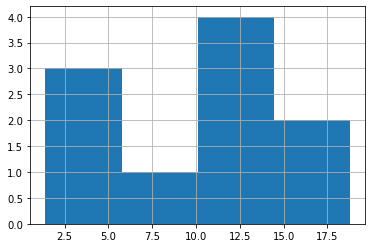

In [452]:
Inflation_Rate.Inflation.hist(bins = 4)